## Example usage of PredictionExplanationsClustering package
**Author**: Andrew Mathis

**Contributor**: Thodoris Petropoulos

### Scope

The scope of this notebook is to provide instructions on how to use the `PredictionExplanationsClustering` package that is included within this repository. The package leverages DataRobot's prediction explanations and modern clustering techniques to provide you with advanced insights of your data.

### Requirements

- Python version 3.7.3
-  DataRobot API version 2.21.0. 
Small adjustments might be needed depending on the Python version and DataRobot API version you are using.

#### Import Libraries

In [ ]:
from PredictionExplanationsClustering import PredictionExplanationsClustering #This is the custom class located in `PredictionExplanationsClustering.py`
import seaborn as sns
import matplotlib.pyplot as plt
import datarobot as dr
import pandas as pd
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,8)})

#### Connect to DataRobot

In [2]:
dr.Client('YOUR_API_KEY',
          endpoint = 'YOUR_HOSTNAME')

#### Load Dataset
Load the dataset of your choice. That dataset is going to be scored using an existing DataRobot project that has been trained to solve this problem.

In [3]:
df = pd.read_excel('readmissions.xlsx')

#### Define a PredictionExplanationsClustering object

This object will store both the intermediate and final results.

In [4]:
pec = PredictionExplanationsClustering(project_id = 'YOUR_PROJECT_ID', 
                                       model_id = 'YOUR_MODEL_ID', 
                                       data = df,
                                       n_reasons = 5)

### Step 1. Use PredictionExplanationsClustering package to calculate prediction explanations for the dataset

I will be using the <code>retrieve_prediction_explanations</code> method to calculate prediction explanations. To see the results, I can use the <code>prediction_explanation_results</code> method.

In [5]:
pec.retrieve_prediction_explanations()

Initiating calculation of prediction explanations. 
This may take a while to complete...


In [6]:
#See prediction explanations
pec.prediction_explanation_results.head()

,row_id,prediction,class_0_label,class_0_probability,class_1_label,class_1_probability,explanation_0_feature,explanation_0_feature_value,explanation_0_label,explanation_0_qualitative_strength,...,explanation_3_feature,explanation_3_feature_value,explanation_3_label,explanation_3_qualitative_strength,explanation_3_strength,explanation_4_feature,explanation_4_feature_value,explanation_4_label,explanation_4_qualitative_strength,explanation_4_strength
0,0,0.0,0.0,0.804846,1.0,0.195154,medical_specialty,Surgery-Neuro,1.0,--,...,diag_2,723,1.0,--,-0.150693,diag_1_desc,Spinal stenosis in cervical region,1.0,--,-0.143018
1,1,0.0,0.0,0.753522,1.0,0.246478,diag_1,664,1.0,---,...,medical_specialty,,1.0,++,0.208037,num_medications,5,1.0,--,-0.161221
2,2,1.0,0.0,0.476540,1.0,0.523460,number_inpatient,1,1.0,+++,...,admission_source_id,,1.0,--,-0.146701,payer_code,MC,1.0,--,-0.102987
3,3,0.0,0.0,0.841873,1.0,0.158127,admission_source_id,Transfer from another health care facility,1.0,---,...,diag_3_desc,Diabetes mellitus without mention of complicat...,1.0,--,-0.173177,medical_specialty,,1.0,++,0.126851
4,4,0.0,0.0,0.746455,1.0,0.253545,medical_specialty,Psychiatry,1.0,--,...,race,AfricanAmerican,1.0,--,-0.102034,diag_3,298,1.0,--,-0.093335


### Step 2. Create a flattened DataFrame of explanation strengths (Requires Step 1.)

I will be using the <code>get_strength_per_feature_cols</code> method to create a flattened dataframe of explanation strengths. To see the results, I can use the <code>strength_per_feature_cols</code> method.

In [7]:
pec.get_strength_per_feature_cols()

Preprocessing results to produce a dataframe of strength per feature...


In [8]:
#See flattened dataframe of explanation strengths
pec.strength_per_feature_cols.head()

,medical_specialty,diag_1,number_inpatient,admission_source_id,discharge_disposition_id,number_diagnoses,num_medications,age,diag_2_desc,num_lab_procedures,...,time_in_hospital,glipizide,glyburide,num_procedures,rosiglitazone,metformin,change,acarbose,nateglinide,gender
0,-0.304218,-0.236345,-0.20635,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.208037,-0.372393,0,0,0,0,-0.161221,0,0,-0.310877,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.409599,-0.146701,0.331118,0,0,0,0,-0.192977,...,0,0,0,0,0,0,0,0,0,0
3,0.126851,0,-0.185517,-0.407301,0,-0.324461,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.179887,0,-0.176385,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 3. Apply UMAP dimentionality reduction algorithm (Requires Step 2.)
Reduce the dimensionality of the flattened prediction explanation strengths in preparation for clustering and visualization.

I do that by running the `run_umap` method on the `PredictionExplanationsClustering` object. Even though there are some default recommended settings, you can choose to change the below variables:

- `n_neighbors` (default=30)
- `min_dist` (default=0.0)
- `n_components` (default=2)

The result of umap can be called using the `clusterable_embedding` method.

In [9]:
pec.run_umap()

Applying UMAP dimentionality reduction...


/Users/thodoris.petropoulos/anaconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [10]:
pec.clusterable_embedding

array([[-0.53120834, -1.2440264 ],
       [-1.4039415 ,  0.25971004],
       [ 2.8967876 ,  7.632284  ],
       ...,
       [ 3.147629  ,  6.926074  ],
       [ 3.2701867 ,  6.837119  ],
       [ 2.166263  ,  7.096341  ]], dtype=float32)

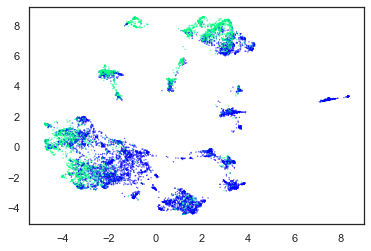

In [12]:
# Visualize embeddings of prediction strengths, colored by the target value
plt.scatter(pec.clusterable_embedding[:, 0], pec.clusterable_embedding[:, 1],
            c=df['YOUR_TARGET_VARIABLE'], 
            s=0.1, cmap='winter');

### Step 4. Run HDBSCAN clustering algorithm (Requires Step 3.)

I will be initiating HDBSCAN using the `run_hdbscan` method. Then I will be plotting the results of the dimentionality reduction and clustering together. Even though there are some default recommended settings, you can choose to change the below variables:

- `min_samples` (default=10)
- `min_cluster_size` (default=500)

In [13]:
pec.run_hdbscan()

Applying HDBSCAN clustering...


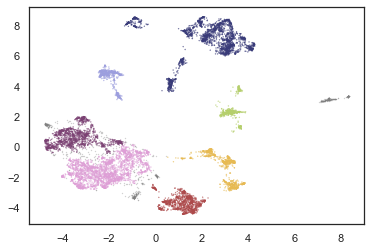

In [14]:
clustered = (pec.labels >= 0)  ###  the -1 cluster is noise within HDBSCAN
plt.scatter(pec.clusterable_embedding[~clustered, 0],
            pec.clusterable_embedding[~clustered, 1],
            c=[[0.5, 0.5, 0.5]], # make the noise points gray
            s=0.1,
            alpha=0.5)
plt.scatter(pec.clusterable_embedding[clustered, 0],
            pec.clusterable_embedding[clustered, 1],
            c=pec.labels[clustered],
            s=0.1,
            cmap='tab20b');

### Step 5. Get Results in a Pandas DataFrame (Requires Step 4.)

Here, we consolidate prediction strengths by cluster together with actual feature values by cluster in a Pandas DataFrame. The results can then be exported for further exploration (or explored within this jupyter notebook).

The above dataframe is calculated using the `get_results` method and can be accessed through the `results` method.

In [15]:
pec.get_results()

Calculating results...


In [17]:
pec.results

clusters,Noise_actual_mean,cluster_0_actual_mean,cluster_1_actual_mean,cluster_2_actual_mean,cluster_3_actual_mean,cluster_4_actual_mean,cluster_5_actual_mean,cluster_6_actual_mean,Noise_expl_mean,cluster_0_expl_mean,cluster_1_expl_mean,cluster_2_expl_mean,cluster_3_expl_mean,cluster_4_expl_mean,cluster_5_expl_mean,cluster_6_expl_mean
time_in_hospital,4.696296,4.805000,3.967273,5.124528,4.516496,3.145505,4.174061,4.652353,-0.005924,0.002596,-0.001069,-0.007609,-0.000530,-0.013746,-0.001728,0.001148
num_lab_procedures,44.746667,47.743333,40.470909,42.926415,35.340159,38.706209,43.708532,42.992155,-0.013204,0.034387,0.010250,-0.005372,-0.069668,-0.005516,0.013500,0.005413
num_procedures,1.613333,1.273333,1.221818,1.433962,1.664391,1.380908,1.221160,1.516515,-0.004470,-0.000800,-0.000810,-0.002868,-0.016363,-0.007708,0.000108,-0.001915
num_medications,17.866667,16.158750,15.780000,16.567925,16.036405,12.688601,14.868259,15.593724,-0.064688,0.001194,0.002447,-0.012861,-0.008134,-0.024249,-0.008840,-0.001902
number_outpatient,0.229630,0.447083,1.405455,0.175472,0.344710,0.091752,0.066212,0.092486,0.011553,0.052035,0.299121,0.011047,0.005620,0.007203,0.001484,0.000720
number_emergency,0.060741,0.222083,0.538182,0.039623,0.072810,0.029657,0.030034,0.049133,0.006681,0.031890,0.138829,0.001866,0.001498,0.002249,0.003421,0.003255
number_inpatient,0.240000,1.359167,0.110909,0.403774,0.031854,0.021316,0.017747,0.040050,-0.060400,0.360727,-0.036036,-0.020597,-0.138988,-0.130749,-0.107587,-0.113294
number_diagnoses,7.385185,7.421250,7.732727,7.458491,6.503982,4.188137,7.172696,7.641206,0.008494,-0.002816,0.037251,-0.010336,-0.111124,-0.285220,-0.000485,0.050089
readmitted,0.202963,0.667500,0.730909,0.152830,0.105802,0.122335,0.489420,0.330718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
predicted,0.125926,0.677083,0.636364,0.032075,0.007964,0.001854,0.243686,0.056978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fast Approach
Alternatively to running Steps 1 - 4, you can call the `run_full_procedure` method. This will automatically run steps 1 - 4. This works best when you do not want to make any processing in between even though intermediate results can still be accessed the same way as before.

In [ ]:
pec.run_full_procedure()